# Time and difficulty

### Is there a statistically significant correlation between the task difficulty rating and the response time?

In [1]:
import pandas as pd

from functions.tests.correlations import spearman_corr
from functions.plots import plot_multi_boxplot, plot_multi_density, plot_multi_scatter

In [2]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv')

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv')

df_merge = df_answers.merge(df_time, on='ID')
df_merge.head()

,ID,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,Trud_all,Corr_all,1a_corr,...,Duration_2a,Duration_2b,Duration_3a,Duration_3b,SumTime_all,SumTime_a,SumTime_b,SumTime_1,SumTime_2,SumTime_3
0,1,3,1,4,3,4,4,19,4,1,...,54.481,58.697,56.314,63.897,276.921,138.810,138.110,43.531,113.178,120.211
1,2,1,2,3,1,2,4,13,5,1,...,42.248,85.329,47.948,129.427,459.647,156.426,303.219,154.693,127.577,177.375
2,3,2,1,3,1,1,1,9,4,1,...,45.165,32.732,8.000,61.197,299.890,121.995,177.892,152.793,77.897,69.197
3,4,3,2,2,1,3,5,16,5,1,...,12.449,37.715,60.980,101.795,337.437,119.477,217.956,124.494,50.164,162.775
4,5,4,2,3,2,3,3,17,6,1,...,55.931,22.132,34.898,62.930,271.458,158.809,112.644,95.562,78.063,97.828


##### H0: There is no statistically significant correlation between the response time and the task difficulty.

##### H1: There is a statistically significant correlation between the response time and the task difficulty.

##### Significance level: $\alpha=0.05$

In [3]:
ALPHA = 0.05

Sum of all graphics

In [4]:
spearman_corr(df_merge['SumTime_all'], df_merge['Trud_all'], print_flag=True, alpha=ALPHA)

Spearman correlation test statistic value: 0.0852197267536738
P-value: 0.6010865074988725
No reason to reject H0, accept H0.


'P-value: 0.60'

Tasks without redundancy

In [5]:
spearman_corr(df_merge['SumTime_a'], df_merge['SumTrud_a'], print_flag=True, alpha=ALPHA)

Spearman correlation test statistic value: 0.24433191958612555
P-value: 0.1286559057620874
No reason to reject H0, accept H0.


'P-value: 0.13'

Tasks with redundancy

In [6]:
spearman_corr(df_merge['SumTime_b'], df_merge['SumTrud_b'], print_flag=True, alpha=ALPHA)

Spearman correlation test statistic value: 0.2764849610238039
P-value: 0.08416034592125447
No reason to reject H0, accept H0.


'P-value: 0.08'

Each task separately

In [7]:
spearman_corr(df_merge['SumTime_1'], df_merge['SumTrud_1'], print_flag=True, alpha=ALPHA)
spearman_corr(df_merge['SumTime_2'], df_merge['SumTrud_2'], print_flag=True, alpha=ALPHA)
spearman_corr(df_merge['SumTime_3'], df_merge['SumTrud_3'], print_flag=True, alpha=ALPHA)

Spearman correlation test statistic value: 0.04109513578155758
P-value: 0.8012164880326393
No reason to reject H0, accept H0.
Spearman correlation test statistic value: 0.6698125300728196
P-value: 2.2797538856240757e-06
There are grounds to reject H0, accept H1.
Spearman correlation test statistic value: 0.5203224549684735
P-value: 0.0005782721876926905
There are grounds to reject H0, accept H1.


'P-value: 0.00'

Each graphic separately

In [8]:
df1a = pd.DataFrame({'time': df_merge['Duration_1a'], 'difficulty': df_merge['1a_trud']})
df2a = pd.DataFrame({'time': df_merge['Duration_2a'], 'difficulty': df_merge['2a_trud']})
df3a = pd.DataFrame({'time': df_merge['Duration_3a'], 'difficulty': df_merge['3a_trud']})

df1b = pd.DataFrame({'time': df_merge['Duration_1b'], 'difficulty': df_merge['1b_trud']})
df2b = pd.DataFrame({'time': df_merge['Duration_2b'], 'difficulty': df_merge['2b_trud']})
df3b = pd.DataFrame({'time': df_merge['Duration_3b'], 'difficulty': df_merge['3b_trud']})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [9]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    spearman_corr(df['time'], df['difficulty'], print_flag=True, alpha=ALPHA)

-------------------------------------
1a:
Spearman correlation test statistic value: 0.18178619636809215
P-value: 0.26158846950607684
No reason to reject H0, accept H0.
-------------------------------------
1b:
Spearman correlation test statistic value: 0.2615450832403114
P-value: 0.10305481767877589
No reason to reject H0, accept H0.
-------------------------------------
2a:
Spearman correlation test statistic value: 0.7051031315890984
P-value: 3.780453416559553e-07
There are grounds to reject H0, accept H1.
-------------------------------------
2b:
Spearman correlation test statistic value: 0.5080199649717133
P-value: 0.0008183311640076995
There are grounds to reject H0, accept H1.
-------------------------------------
3a:
Spearman correlation test statistic value: 0.5686566638381635
P-value: 0.00012900145656780354
There are grounds to reject H0, accept H1.
-------------------------------------
3b:
Spearman correlation test statistic value: 0.4552912315235231
P-value: 0.0031574209832

### Summary:
There is a statistically significant correlation between the response time and the task difficulty for:
- sum of all graphics: 2, 3
- graphics 2a,2b,3a,3b

Overall: the response time increased with the increase in the difficulty rating (for all analyzed cases except 1a and 1b this increase was statistically significant).

### Plots

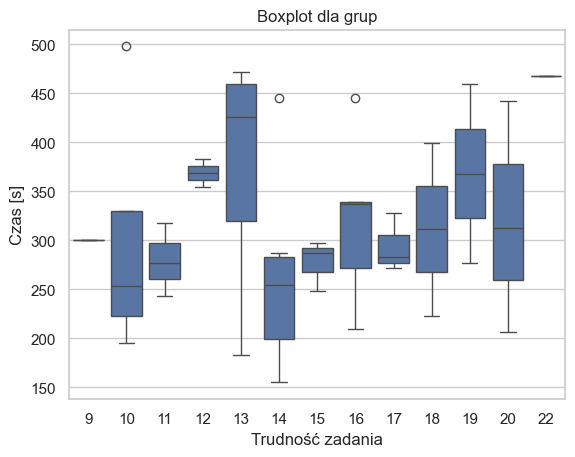

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


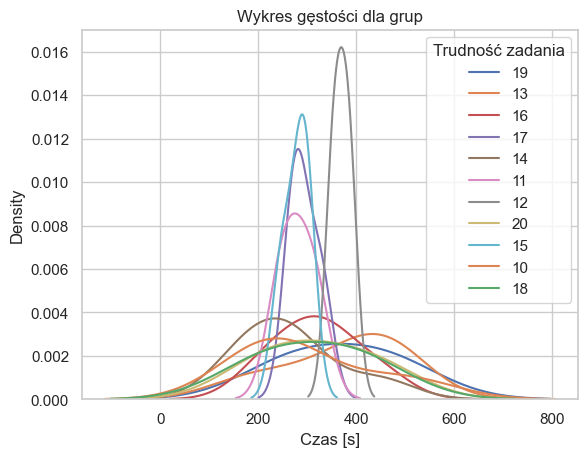

In [10]:
plot_multi_boxplot(df_merge, 'Trud_all', 'SumTime_all', 'Trudność zadania', 'Czas [s]')
plot_multi_density(df_merge, 'SumTime_all', 'Trud_all', 'Czas [s]', 'Trudność zadania')

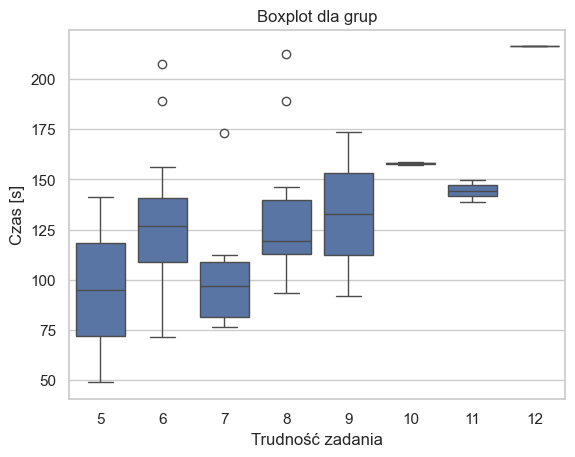

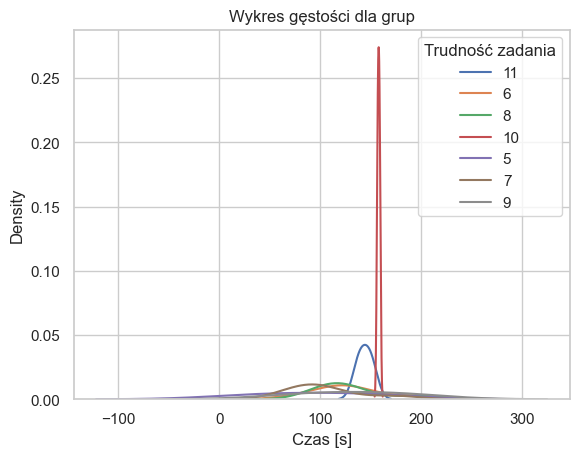

In [11]:
plot_multi_boxplot(df_merge, 'SumTrud_a', 'SumTime_a', 'Trudność zadania', 'Czas [s]')
plot_multi_density(df_merge, 'SumTime_a', 'SumTrud_a', 'Czas [s]', 'Trudność zadania')

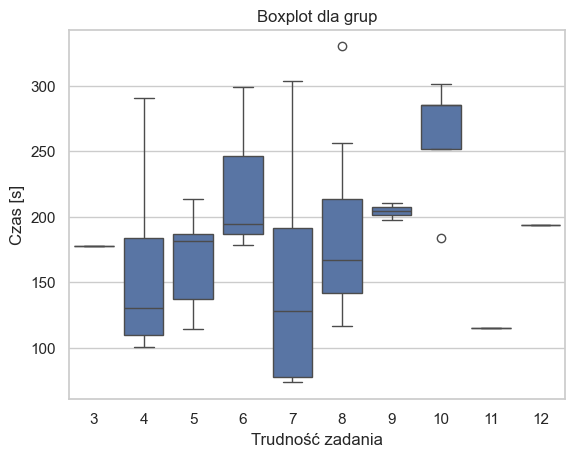

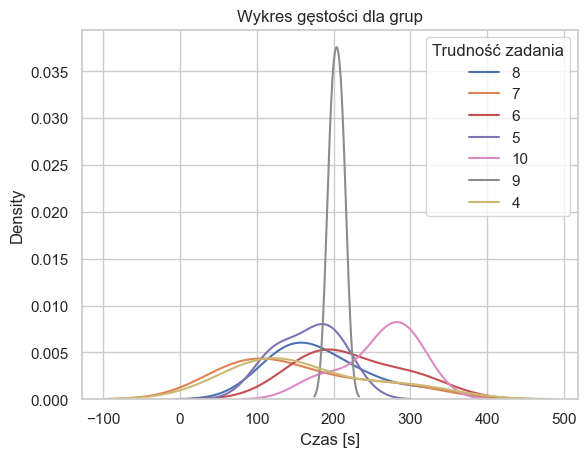

In [12]:
plot_multi_boxplot(df_merge, 'SumTrud_b', 'SumTime_b', 'Trudność zadania', 'Czas [s]')
plot_multi_density(df_merge, 'SumTime_b', 'SumTrud_b', 'Czas [s]', 'Trudność zadania')

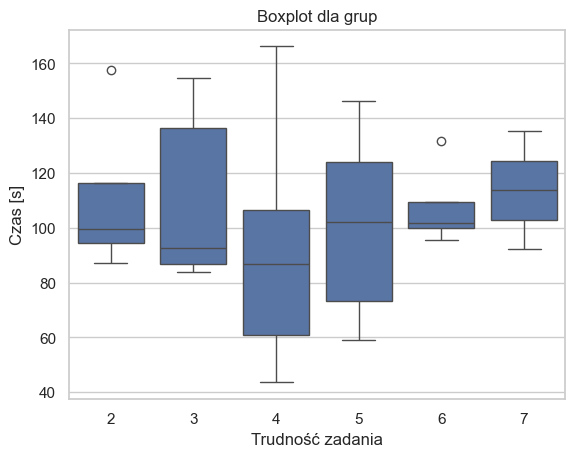

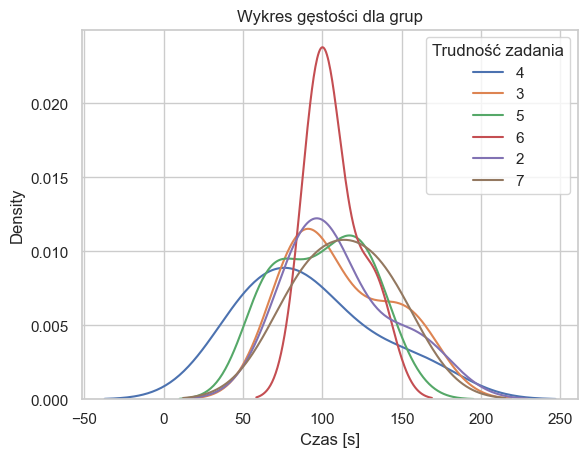

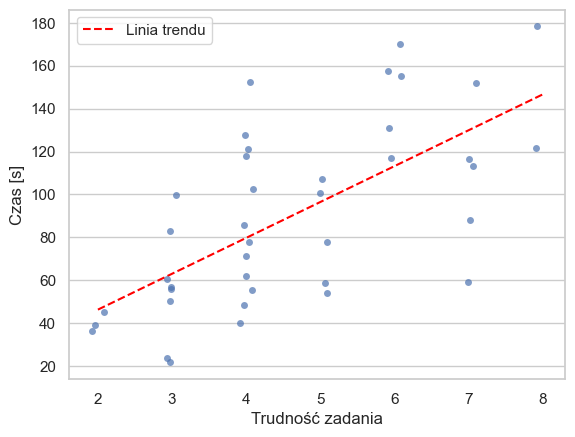

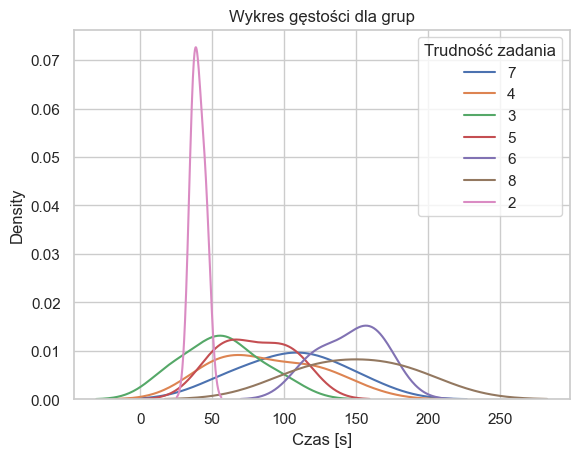

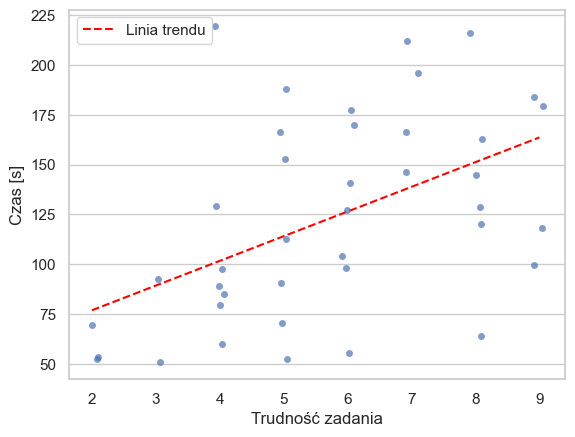

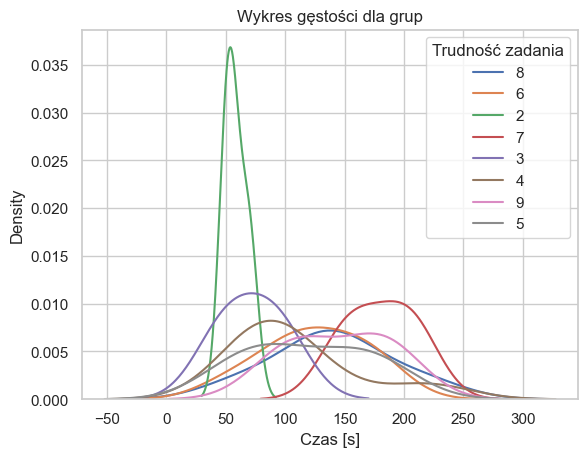

In [13]:
plot_multi_boxplot(df_merge, 'SumTrud_1', 'SumTime_1', 'Trudność zadania', 'Czas [s]')
plot_multi_density(df_merge, 'SumTime_1', 'SumTrud_1', 'Czas [s]', 'Trudność zadania')

plot_multi_scatter(df_merge, 'SumTrud_2', 'SumTime_2', 'Trudność zadania', 'Czas [s]', '')
plot_multi_density(df_merge, 'SumTime_2', 'SumTrud_2', 'Czas [s]', 'Trudność zadania')

plot_multi_scatter(df_merge, 'SumTrud_3', 'SumTime_3', 'Trudność zadania', 'Czas [s]', '')
plot_multi_density(df_merge, 'SumTime_3', 'SumTrud_3', 'Czas [s]', 'Trudność zadania')

-------------------------------------
1a:


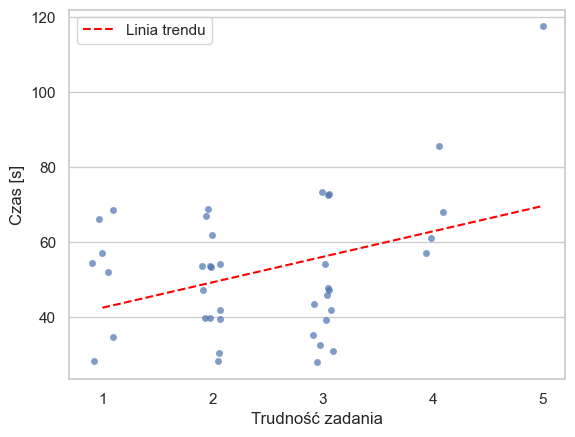

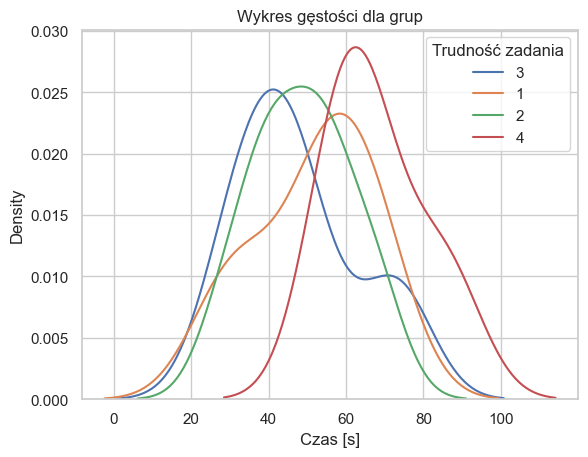

-------------------------------------
1b:


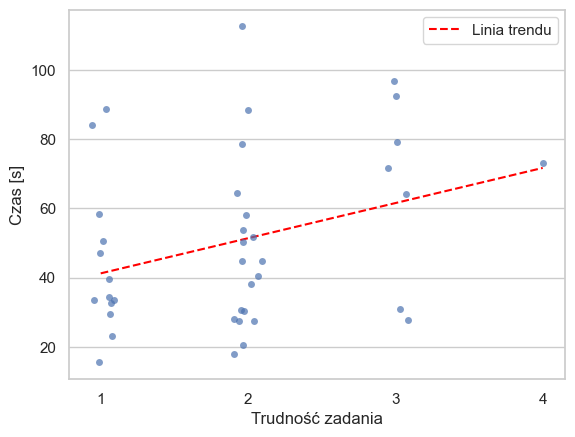

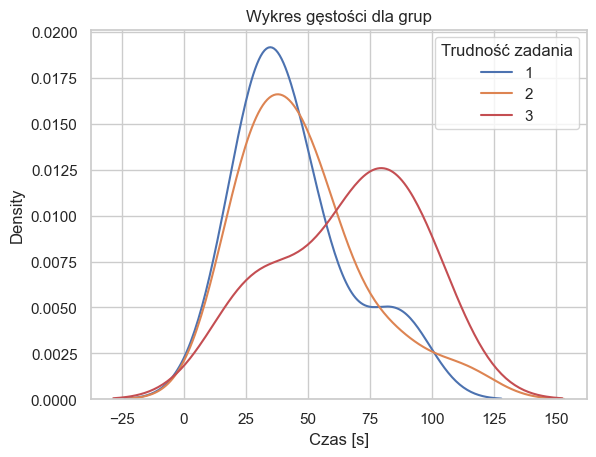

-------------------------------------
2a:


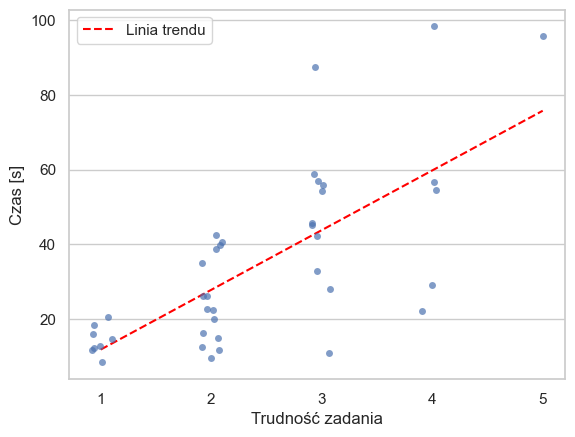

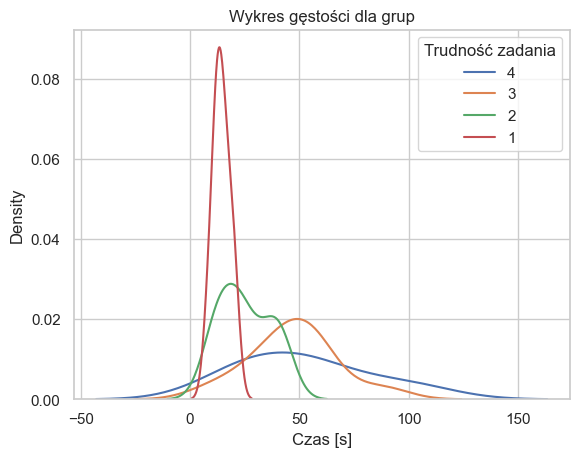

-------------------------------------
2b:


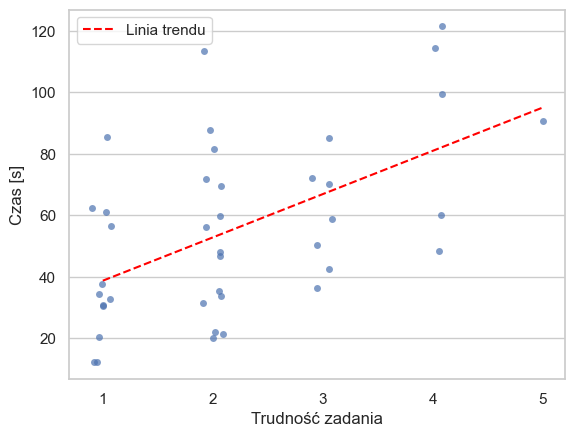

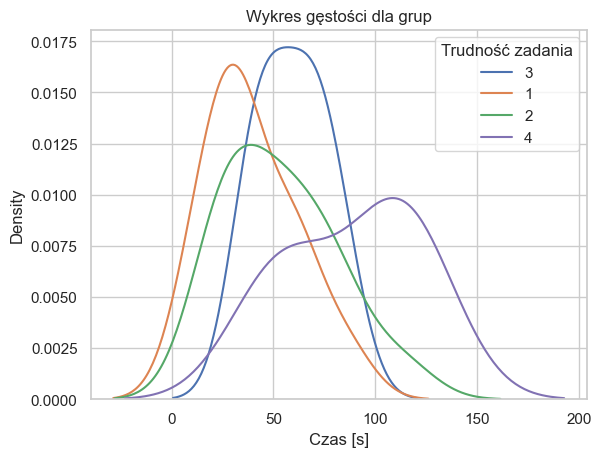

-------------------------------------
3a:


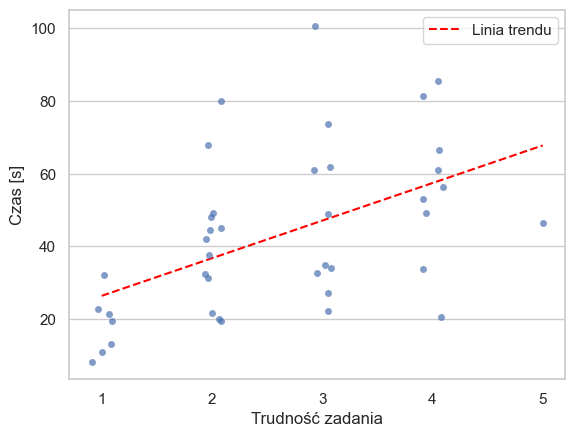

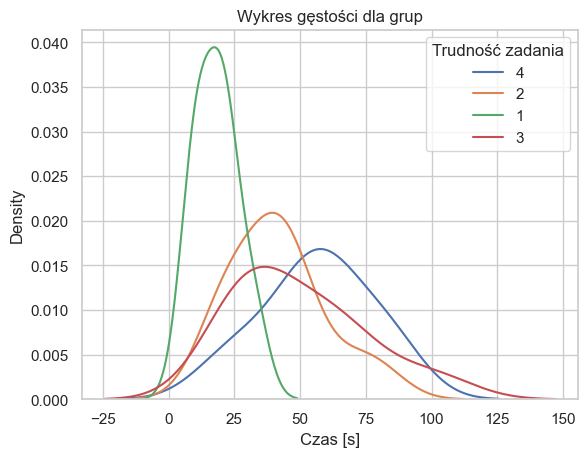

-------------------------------------
3b:


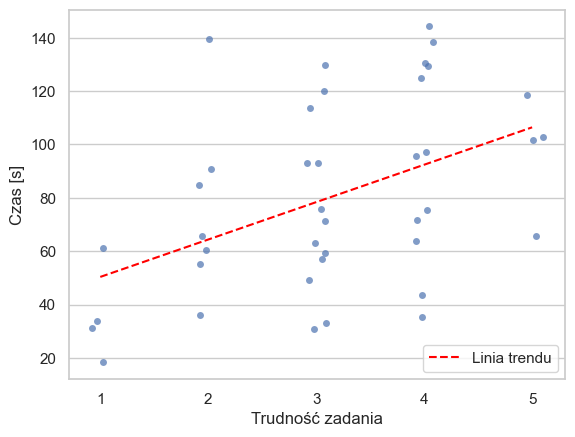

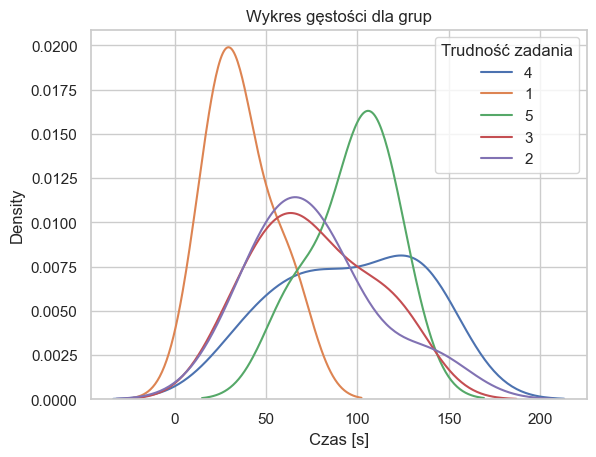

In [14]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    plot_multi_scatter(df, 'difficulty', 'time', 'Trudność zadania', 'Czas [s]', title='')
    plot_multi_density(df, 'time', 'difficulty', 'Czas [s]', 'Trudność zadania', title='Wykres gęstości dla grup')